<a href="https://colab.research.google.com/github/arkeodev/pytorch-tutorial/blob/main/pytorch_dynamic_computation_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Dynamic Computation Graphs in PyTorch

## The Basics of Computation Graphs

### What is a Computation Graph?

A computation graph is a directed graph where nodes represent mathematical operations or variables, and edges represent the flow of data between these operations. This graphical representation allows for an intuitive visualization of complex mathematical functions and their derivatives, making it a cornerstone of modern deep learning frameworks.

### Why Computation Graphs?

* Simplification of Complex Operations: They break down complex operations into simpler steps.
* Automatic Differentiation: They enable frameworks to automatically compute gradients—essential for training neural networks.
* Optimization: They allow for optimization of mathematical expressions before execution.

**Example: A Basic Computation Graph**

Consider a simple neural network operation where we have an input $(x)$, which we multiply by a weight $(w)$ and then apply an activation function, such as a ReLU (Rectified Linear Unit). The operation can be expressed as $(y = ReLU(x \cdot w))$.

In [1]:
import torch
import torch.nn.functional as F

# Create tensors
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
w = torch.tensor([0.5, -0.5, 0.1], requires_grad=True)

# Perform linear operation
z = torch.dot(x, w)

# Apply activation function (ReLU)
y = F.relu(z)

# Compute gradients
y.backward()

print(f'Input x: {x}')
print(f'Weights w: {w}')
print(f'Output y after ReLU: {y}')
print(f'Gradient of x: {x.grad}')
print(f'Gradient of w: {w.grad}')

Input x: tensor([1., 2., 3.], requires_grad=True)
Weights w: tensor([ 0.5000, -0.5000,  0.1000], requires_grad=True)
Output y after ReLU: 0.0
Gradient of x: tensor([0., -0., 0.])
Gradient of w: tensor([0., 0., 0.])


In this code:
- `x` and `w` are input tensors with `requires_grad=True`, indicating that we want to compute gradients with respect to these tensors.
- `torch.dot(x, w)` performs the linear operation (dot product).
- `F.relu(z)` applies the ReLU activation function.
- `y.backward()` computes the gradients of `y` with respect to the tensors that have `requires_grad=True`.

In this example where the graph is dynamically built during the execution of the operations.

**The `backward()` call triggers the construction of the graph and the computation of the gradients, highlighting PyTorch's dynamic nature.**

## Static vs. Dynamic Computation Graphs

### Static Computation Graphs

In static computation graphs, the structure of the network is defined and compiled before any actual numerical computation occurs. TensorFlow v1 is a prime example of a framework that utilizes static graphs.

**Characteristics**:
- **Predefined Structure**: The graph's architecture must be fully specified before runtime.
- **Compilation Phase**: The graph is compiled into an optimized execution plan, which can lead to efficient execution on various hardware.
- **Limited Flexibility**: Modifying the graph after compilation is not straightforward, requiring the entire graph to be redefined and recompiled for changes to take effect.

**Example**: In TensorFlow v1, creating a static graph might involve defining placeholders for inputs, specifying operations, and then compiling the model for training and inference.

### Dynamic Computation Graphs

Dynamic computation graphs are constructed on-the-fly during execution. PyTorch is well-known for its use of dynamic graphs, also referred to as define-by-run graphs.

**Characteristics**:
- **Flexibility**: The graph's structure can change with every iteration, offering tremendous flexibility for models that need conditional operations or dynamic inputs.
- **Ease of Debugging**: Since the graph is built at runtime, it's easier to debug. You can insert print statements or use debugging tools just as you would in any other Python script.
- **Iterative Development**: Allows for more intuitive and interactive model development, as changes to the model's structure can be made on the fly.

**Example**: In PyTorch, the computation graph for a model is created dynamically. This means you can use standard Python control flow operators like loops and conditionals to alter the graph each time the code is run.

## Understanding Autograd in PyTorch

One of the most powerful features of PyTorch is its `autograd` system. This system allows for automatic differentiation, making the training of neural networks straightforward and efficient. Let's dive into how `autograd` works and explore the role of the `Tensor` class and its `requires_grad` attribute.

### What is Automatic Differentiation?

Automatic differentiation is a key component in training neural networks. It automates the computation of gradients—essential for the optimization of model parameters. In essence, automatic differentiation enables the adjustment of weights in response to the loss function, guiding the model towards better performance.



### The Tensor Class and `requires_grad

The `Tensor` class is central to PyTorch. Tensors in PyTorch can store data (like weights and inputs in a network) and keep track of every operation applied to them. Here's where the `requires_grad` attribute comes into play:

- **`requires_grad` Attribute**: When set to `True`, PyTorch tracks all operations on the tensor, and accumulates the gradients on another tensor (the `.grad` attribute) whenever the `.backward()` method is called. This is essential for learning parameters in neural networks.

### How Autograd Works







When performing operations on tensors with `requires_grad=True`, PyTorch dynamically constructs a computation graph. Nodes in the graph represent tensors, while edges represent functions that produce output tensors from input tensors. When the `.backward()` method is called on a tensor (typically the loss), PyTorch calculates the gradients using this graph, propagating backwards from the tensor.



In [2]:
import torch
import torch.nn.functional as F

# Define inputs
x = torch.randn(1, 10, requires_grad=True)  # A random tensor representing input features

# Define weights and bias for a linear layer
weights = torch.randn(10, 5, requires_grad=True)  # Weights for the linear layer
bias = torch.randn(5, requires_grad=True)  # Bias for the linear layer

# Linear operation
linear_output = torch.matmul(x, weights) + bias

# Activation function (ReLU)
relu_output = F.relu(linear_output)

# Compute gradients
relu_output.backward(torch.ones_like(relu_output))

print(f'Gradients for weights: \n{weights.grad}')

Gradients for weights: 
tensor([[-0.2069, -0.2069, -0.2069, -0.2069, -0.0000],
        [-0.8820, -0.8820, -0.8820, -0.8820, -0.0000],
        [ 2.6136,  2.6136,  2.6136,  2.6136,  0.0000],
        [ 2.7139,  2.7139,  2.7139,  2.7139,  0.0000],
        [-1.6857, -1.6857, -1.6857, -1.6857, -0.0000],
        [-1.4667, -1.4667, -1.4667, -1.4667, -0.0000],
        [-1.3647, -1.3647, -1.3647, -1.3647, -0.0000],
        [-0.1918, -0.1918, -0.1918, -0.1918, -0.0000],
        [ 0.7730,  0.7730,  0.7730,  0.7730,  0.0000],
        [-0.0225, -0.0225, -0.0225, -0.0225, -0.0000]])


## Backpropagation in Dynamic Graphs



Backpropagation in the context of dynamic graphs involves three main steps:

1. **Forward Pass**: In this step, the network makes predictions by performing operations on the input data, constructing the computation graph in the process. Each node in the graph represents an operation, and each edge represents a tensor that flows between operations.

2. **Loss Calculation**: Once the output is obtained, the loss (or error) is computed using a loss function. This loss indicates how far off the predictions are from the actual values.

3. **Backward Pass**: During the backward pass, gradients of the loss function with respect to each parameter (weight) are calculated by traversing the graph in reverse. This is where the dynamic nature of PyTorch shines; the graph can adapt to each iteration's operations, making it straightforward to compute gradients even in complex models.


## Dynamic Graph Modifications During Runtime

One of the most powerful features of dynamic computation graphs, as utilized in PyTorch, is the ability to modify the graph during runtime. This capability allows for a level of flexibility and adaptability in model architecture that is particularly useful in certain deep learning scenarios.


Modifying the computation graph during runtime can be essential for a variety of reasons:

 ### Conditional Operations

Certain models may require different computation paths based on runtime data. For instance, in decision-making models or models that process variable-length sequences, the operations performed may vary from one input to another.

Below is a simplified example demonstrating how a conditional operation can modify the computation graph in PyTorch based on runtime data. This example simulates a scenario where an additional layer is applied to the input if its sum exceeds a certain threshold:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConditionalModel(nn.Module):
    def __init__(self):
        super(ConditionalModel, self).__init__()
        self.linear1 = nn.Linear(10, 20)
        self.linear2 = nn.Linear(20, 5)
        self.threshold = 10

    def forward(self, x):
        x = F.relu(self.linear1(x))
        # Conditional operation based on runtime data
        if x.sum() > self.threshold:
            x = F.relu(self.linear2(x))
        return x

# Create an instance of the model
model = ConditionalModel()

# Example input tensor
input_tensor = torch.randn(1, 10)

# Forward pass through the model
output = model(input_tensor)
print(output)

In this example:
- We define a simple neural network model with two linear layers.
- During the forward pass, the input tensor is passed through the first linear layer and a ReLU activation function.
- A conditional check is performed on the sum of the output from the first layer. If the sum exceeds a predefined threshold, the output is passed through a second linear layer and another ReLU activation. This conditionally modifies the computation graph based on the runtime data.
- The flexibility of dynamic graphs in PyTorch allows for this type of runtime modification to the model's structure, which would be much more complex or even impossible in a static graph framework.

### Dynamic Network Architectures

Some advanced neural network architectures adjust their structure during training to optimize performance, requiring dynamic adjustments to the computation graph.

- **Recurrent Neural Networks (RNNs)** dealing with variable sequence lengths where the computation graph needs to adapt to the length of each input sequence.
- **Neural Networks with Conditional Logic**, where certain layers or operations are only applied based on specific conditions met by the input data.
- **Neuroevolutionary Models** where the architecture of the network itself is subject to change and evolution as part of the training process.

Example: RNNs for Variable Sequence Lengths

Let's consider a simple example illustrating how PyTorch's dynamic graphs facilitate working with variable sequence lengths in RNNs:

In [3]:
import torch
import torch.nn as nn

class VariableLengthRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VariableLengthRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, lengths):
        # Pack the sequence
        x_packed = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        output_packed, _ = self.rnn(x_packed)
        output, _ = nn.utils.rnn.pad_packed_sequence(output_packed, batch_first=True)
        output = self.fc(output)
        return output

# Example usage
input_size = 10
hidden_size = 20
output_size = 5
model = VariableLengthRNN(input_size, hidden_size, output_size)

# Dummy input tensor (batch size, sequence length, input size)
x = torch.randn(3, 5, 10)
lengths = torch.tensor([5, 3, 2])  # Actual lengths of each sequence in the batch

output = model(x, lengths)
print(output)

tensor([[[-0.2228,  0.2660, -0.3310,  0.5142, -0.1781],
         [-0.2058, -0.0255, -0.0986,  0.5551,  0.2771],
         [ 0.0232,  0.5068, -0.4271,  0.2033, -0.1650],
         [-0.0571,  0.2920, -0.1142,  0.4609, -0.1046],
         [-0.1845,  0.0746,  0.1271,  0.2061, -0.0874]],

        [[-0.2280,  0.1238, -0.1963,  0.2903,  0.0523],
         [-0.2003,  0.2125, -0.3221,  0.4434, -0.1058],
         [-0.1425,  0.2660, -0.4307,  0.5038,  0.1863],
         [-0.1296,  0.1775, -0.1950,  0.1877, -0.0291],
         [-0.1296,  0.1775, -0.1950,  0.1877, -0.0291]],

        [[-0.0624,  0.6285, -0.4277,  0.4021, -0.3546],
         [-0.1996,  0.1118, -0.0439,  0.3617,  0.2235],
         [-0.1296,  0.1775, -0.1950,  0.1877, -0.0291],
         [-0.1296,  0.1775, -0.1950,  0.1877, -0.0291],
         [-0.1296,  0.1775, -0.1950,  0.1877, -0.0291]]],
       grad_fn=<ViewBackward0>)


In this example, the VariableLengthRNN model dynamically handles input sequences of varying lengths, illustrating the flexibility of dynamic graphs in PyTorch. The model can process each sequence according to its actual length, optimizing performance and efficiency.

## Trade-offs and Considerations of Dynamic Computation Graphs

While dynamic computation graphs offer significant advantages in flexibility and ease of use, there are trade-offs and considerations that practitioners should be aware of. Understanding these can help in making informed decisions and optimizing performance when working with frameworks like PyTorch.

### Potential Downsides of Dynamic Graphs

1. **Runtime Overhead**: Since the graph is built and rebuilt at each iteration, there can be additional overhead compared to static graphs, where the computation graph is built once and then executed efficiently. This can impact training speed, especially for very large models or datasets.

2. **Memory Usage**: Dynamic graphs can sometimes use more memory because the framework needs to store additional information at runtime to build the graph dynamically. This can be a consideration when working with large models or limited hardware resources.

3. **Optimization Limitations**: Static graphs allow for extensive optimization before execution, including simplifying calculations, fusing operations, and optimizing memory usage. Dynamic graphs, due to their nature, might not benefit from these optimizations to the same extent.

### Optimizing Performance with Dynamic Graphs

Despite these considerations, there are several strategies and best practices to mitigate potential downsides and optimize performance when using dynamic graphs:


1. **Use TorchScript**: TorchScript is a tool in PyTorch that allows for the creation of serializable and optimizable models from PyTorch code. By converting a dynamic model to TorchScript, you can gain performance improvements similar to those of static graphs while retaining the flexibility of PyTorch.

    ```python
    import torch
    class MyModel(torch.nn.Module):
        def forward(self, x):
            return x * 2

    model = MyModel()
    scripted_model = torch.jit.script(model)
    ```

2. **Optimize Data Loading**: The efficiency of your data pipeline can significantly affect overall performance. Utilize `torch.utils.data.DataLoader` with multiple workers (`num_workers`) to parallelize data loading and preprocessing.

3. **Profile Your Models**: PyTorch provides profiling tools that can help identify bottlenecks in your models. Use `torch.autograd.profiler` to understand where the most time is being spent and optimize those areas.

    ```python
    with torch.autograd.profiler.profile(use_cuda=True) as prof:
        # Your model inference or training loop here
    print(prof)
    ```

4. **Minimize Tensor Operations Inside Loops**: Operations inside loops can dramatically slow down your training or inference time. Whenever possible, try to use batch operations outside loops and leverage PyTorch’s optimized tensor operations.

5. **Leverage In-Place Operations**: In-place operations in PyTorch (those that end with `_`, like `add_`) can reduce memory usage by modifying tensors in-place rather than creating new ones. However, use them cautiously as they can make debugging more difficult.

6. **Manage Device Memory**: When working with GPU, efficiently manage memory by moving tensors to the device at the beginning of your workflow and ensuring that intermediate tensors are deleted or go out of scope when no longer needed.

## Zeroing vs. Accumulating Gradients

In the training loop of a neural network, managing gradients properly is crucial for effective learning. Understanding when to accumulate gradients and when to zero them out is key to optimizing your training process

### When to Zero the Gradients

- **Start of Each Iteration**: Typically, you should zero the gradients at the beginning of each training iteration. This is because gradients are accumulated by default whenever `.backward()` is called on the loss tensor. If you don't manually zero the gradients, you'll end up with accumulated gradients from all previous `.backward()` calls, which leads to incorrect gradient values during optimization.


    ```python
    optimizer.zero_grad()
    ```

    This command zeroes the gradients of all parameters in the optimizer, ensuring that only the current iteration's gradients are used for parameter updates.

### When to Accumulate Gradients

- **Handling Large Datasets/Batches**: Sometimes, the dataset or batch size is too large to fit into memory. In such cases, you might divide your data into smaller mini-batches that fit into memory but still want to update the model as if the entire batch was processed together. This technique is known as gradient accumulation.

    Here, you intentionally skip zeroing out the gradients for several iterations, allowing the gradients to accumulate from multiple mini-batches. After accumulating the desired amount, you perform a single optimization step.

    ```python
    # Assume n_steps is the number of steps for which you want to accumulate gradients
    for step, (inputs, labels) in enumerate(data_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        
        if (step + 1) % n_steps == 0:
            # Update parameters after accumulating gradients
            optimizer.step()
            # Zero the gradients after updating
            optimizer.zero_grad()
    ```

    In this scenario, gradients from `n_steps` mini-batches are accumulated before a single optimization step is performed. This approach allows the effective batch size to be larger than what could physically fit in memory, improving model performance without increasing hardware requirements.



## Some Advanced Uses of Autograd

PyTorch's `autograd` system offers versatility far beyond the basic gradient calculations required for backpropagation in neural network training. It supports the computation of higher-order derivatives and the automatic differentiation of arbitrary functions, making it a powerful tool for a wide range of applications in optimization, scientific computing, and beyond. Let's delve into these capabilities:

### Higher-Order Derivatives

Higher-order derivatives are derivatives of derivatives, providing deeper insights into the behavior of functions, such as curvature and stability analysis. In the context of deep learning, second-order derivatives (Hessians) can be used in advanced optimization methods, including Newton's method, which requires the Hessian matrix for updates.

PyTorch's `autograd` can compute higher-order derivatives by applying the `.backward()` method multiple times, given that the graph is retained. For second-order derivatives, one can use the `torch.autograd.functional.hessian` function to directly compute the Hessian matrix.

In [5]:
import torch

# Define a simple function
def f(x):
    return x ** 4 - x ** 2

# Create a tensor and enable gradient computation
x = torch.tensor([1.0], requires_grad=True)

# First derivative
y = f(x)
y.backward(create_graph=True)

# Second derivative (Hessian for this scalar function)
x_grad = x.grad
x_grad.backward()
hessian = x.grad

print(f"First derivative at x=1: {x_grad}")
print(f"Second derivative (Hessian) at x=1: {hessian}")

First derivative at x=1: tensor([12.], grad_fn=<CopyBackwards>)
Second derivative (Hessian) at x=1: tensor([12.], grad_fn=<CopyBackwards>)


/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:266: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1177.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


### Automatic Differentiation of Arbitrary Functions

Automatic differentiation (AD) in PyTorch is not limited to neural networks or machine learning models. It can be applied to any differentiable function coded up in PyTorch. This makes it invaluable for tasks requiring gradient computation across various fields, including physics simulations, engineering design optimization, and financial modeling.

AD works by decomposing complex functions into elementary operations for which derivatives are known. The chain rule is then applied to these operations to compute the derivative of the entire function. PyTorch handles this process dynamically, constructing the computation graph on-the-fly.

In [4]:
import torch

# Define an arbitrary differentiable function
def g(x, y):
    return torch.sin(x) * torch.log(y)

# Variables with requires_grad=True
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

# Compute the function
z = g(x, y)

# Compute gradients
z.backward()

print(f"Gradient with respect to x: {x.grad}")
print(f"Gradient with respect to y: {y.grad}")

Gradient with respect to x: tensor([0.3745])
Gradient with respect to y: tensor([0.4207])


### The Application of Autograd to the Realm of Reinforcement Learning (RL)

The application of PyTorch's `autograd` system extends into the realm of Reinforcement Learning (RL), where it provides a powerful mechanism for learning policies that maximize cumulative rewards. In RL, an agent learns to make decisions by interacting with an environment to achieve a goal. The agent's ability to learn and improve over time hinges on its capacity to evaluate the effectiveness of its actions and adjust its strategy accordingly. This is where `autograd` comes into play, facilitating the optimization of policy parameters based on the computed gradients of the reward function.

#### Reinforcement Learning Basics

In RL, the agent follows a policy (π) to decide on actions (a) based on the current state (s) of the environment. The policy is often parameterized by θ, and the agent's objective is to maximize the expected cumulative reward. The reward signal is a critical feedback mechanism that indicates the effectiveness of the chosen actions. By applying gradient-based optimization, the agent iteratively updates its policy parameters (θ) to improve performance.

#### Using Autograd in RL

The process of updating the policy parameters requires the computation of gradients of the expected cumulative reward with respect to the policy parameters (θ). This is where PyTorch's `autograd` becomes invaluable. It automates the computation of these gradients, even when the reward function is complex and involves a long sequence of actions and states.

#### Policy Gradient Methods

Policy gradient methods are a class of algorithms in RL that directly optimize the policy parameters by computing estimates of the gradients of the expected reward. The `autograd` system is particularly well-suited for implementing these algorithms, as it can efficiently compute gradients through sequences of operations, which in RL corresponds to sequences of states and actions.

#### Example: Simple Policy Gradient

Here's a simplified conceptual example to illustrate how `autograd` might be used in an RL context to update policy parameters:

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define necessary variables
features = 10  # Number of input features
actions = 2    # Number of output actions
learning_rate = 0.01
num_episodes = 5  # Number of episodes for training

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.linear = nn.Linear(features, actions)

    def forward(self, x):
        return torch.softmax(self.linear(x), dim=-1)

# Initialize policy
policy = Policy()
optimizer = optim.Adam(policy.parameters(), lr=learning_rate)

# Dummy data for the example
states = torch.randn(num_episodes, features)

# Assume these are cumulative rewards for simplicity
rewards = torch.randn(num_episodes)

for state, reward in zip(states, rewards):
    # Forward pass to get action probabilities
    action_probs = policy(state.unsqueeze(0))  # Add batch dimension

    # Dummy action selection (for illustration)
    selected_action = torch.argmax(action_probs)
     # Remove batch dimension and get the selected action probability
    selected_action_prob = action_probs.squeeze()[selected_action]

    # Simplified loss function for illustration
    loss = -torch.log(selected_action_prob) * reward

    # Zero gradients
    optimizer.zero_grad()
    # Backward pass to compute gradients
    loss.backward()
    # Update policy parameters
    optimizer.step()


In this corrected script:
- `features` and `actions` are defined to specify the input and output sizes of the linear layer in the `Policy` model.
- `num_episodes` is defined to simulate the number of training episodes.
- A batch dimension is added to the state tensor before passing it to the model by using `unsqueeze(0)`. This is important because PyTorch models expect input data in the format `(batch_size, features)`.
- The selection of an action and the calculation of the loss have been simplified to fit the context of this example. It demonstrates selecting the action with the highest probability and using its probability to compute the loss.

## How PyTorch Manages Memory Automatically

PyTorch's `autograd` system plays a crucial role in optimizing memory usage during the training process, ensuring resources are efficiently allocated and freed up as needed.

Here’s how it contributes to automatic memory management:

- **Tracking Tensor Dependencies**: Every tensor operation adds nodes to the computation graph, creating a network of dependencies among tensors. This network is key to understanding which tensors are necessary for computing gradients and which can be discarded.
  
- **Freeing Unused Tensors**: During the backward pass, once gradients are computed for a given tensor, PyTorch can automatically release the memory of tensors that are no longer needed.

- **Delayed Allocation**: The dynamic nature of PyTorch's computation graph means memory for gradients doesn’t need to be allocated until it's clear what the memory requirements will be. This just-in-time approach to memory allocation allows for more efficient use of available resources.

While PyTorch's automatic memory management handles much of the heavy lifting, users can optimize memory usage further by:

- **Using In-Place Operations**: Where appropriate, use in-place versions of operations (e.g., `add_()` instead of `add()`) to reduce memory footprint.
  
- **Detaching Tensors**: If you have tensors that you know will not be needed for gradient computation, use `.detach()` to remove them from the computation graph and reduce memory usage.

- **Clearing the Cache in CUDA**: For GPU training, periodically clearing the CUDA cache with `torch.cuda.empty_cache()` can help free up unused memory.

## Visualization of the Computational Graph

Visualization tools that integrate with PyTorch can render the computation graph, providing insights into the model's structure and the relationships between its components. This can be invaluable for:

Several libraries and tools are available for visualizing PyTorch computation graphs, each offering different features and levels of detail:

- **TensorBoard**: Originally developed for TensorFlow, TensorBoard can be used with PyTorch via the `torch.utils.tensorboard` module. It provides visualization for the computational graph, along with training metrics and model parameters.
  
- **torchviz**: A lightweight tool specifically designed for visualizing PyTorch computation graphs. It generates a graph visualization using the `Graphviz` software, highlighting the operations and tensors involved in the model's forward pass.

- **Netron**: While primarily used for visualizing ONNX models, Netron can also display models converted from PyTorch to the ONNX format. This can be useful for a high-level overview of the model architecture.

Here’s a simple example of how to use `torchviz` to visualize a computation graph of a PyTorch model:

In [8]:
! pip install torchviz -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6

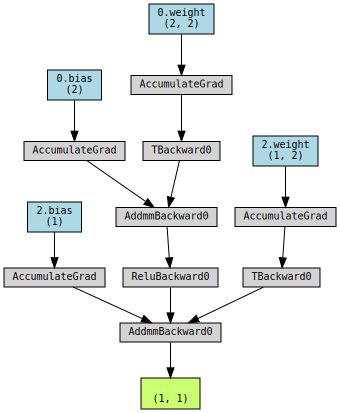

In [9]:
import torch
from torchviz import make_dot

# Define a simple model
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1)
)

# Generate a dummy input
x = torch.randn(1, 2)

# Perform a forward pass
y = model(x)

# Visualize the computation graph
make_dot(y, params=dict(model.named_parameters()))

This code will generate a visualization of the computation graph, showing how the dummy input `x` flows through the model to produce the output `y`, along with the parameters of each layer.

## References

- Overview of PyTorch Autograd Engine: (https://pytorch.org/blog/overview-of-pytorch-autograd-engine/)

- How Computational Graphs are Constructed in PyTorch: (https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/)